<a href="https://colab.research.google.com/github/Marvayo/How-to-implement-an-ML-pipeline/blob/master/Proyecto_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io 
from numpy import array
from seaborn import load_dataset
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving documentos.csv to documentos (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['documentos.csv'])) 
print(df)

                                             DOCUMENTO    FCH_CREA
0    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  03/01/2007
1    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  23/01/2007
2    {\rtf1\ansi\ansicpg1252\uc1\deff0{\fonttbl  {\...  23/01/2007
3    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  29/01/2007
4    {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  29/01/2007
..                                                 ...         ...
234  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
235  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
236  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  19/06/2007
237  {\rtf1\ansi\ansicpg1252\uc1\deff1{\fonttbl  {\...  21/06/2007
238  {\rtf1\ansi\ansicpg1252\uc1\deff0{\fonttbl  {\...  21/06/2007

[239 rows x 2 columns]


In [ ]:
denuncias=df["DOCUMENTO"].str.upper()#convertir a mayúsculas
fechas=df["FCH_CREA"]#convertir a mayúsculas


denuncias.shape
fechas.shape

(239,)

In [ ]:
denuncias=df["DOCUMENTO"].str.upper()#convertir a mayúsculas
denuncias
denuncia1=np.array(denuncias[0].split())

denuncia1.shape
denuncias_palabras={}
for i, denuncia in enumerate(denuncias):#iterando en c/denuncia y reg. de num de iteración
    denuncias_palabras[i]=np.array(denuncia.split())

In [ ]:
denuncias_palabras[50].shape
long_max=0
for denuncia in denuncias_palabras.values(): 
    numWords=len(denuncia)
    if long_max<numWords: 
        long_max=numWords
numPalabras=long_max
print(numPalabras)#Es el valor que tendrá cada renglón 

3007


In [ ]:
type(denuncias_palabras[0])
len(denuncias_palabras[0])#queremos que esta denuncia tenga la longitud de 3007
denuncia1=denuncias_palabras[0]
nueva_denuncia1=np.append(denuncia1, [1,2,3])
len(nueva_denuncia1)

1508

In [ ]:
nuevo_denuncias={}
for i, denuncia in enumerate(denuncias_palabras.values()):
    palabras_agregar=long_max-len(denuncia) 
    
    nuevo_denuncias[i]=np.append(denuncia, palabras_agregar*['b@sur@'])

numRenglones=len(nuevo_denuncias )
print(numRenglones)#0 al 238


239


In [ ]:
nuevo_denuncias

{0: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U187'),
 1: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U179'),
 2: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF0{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U275'),
 3: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U179'),
 4: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}', ..., 'b@sur@',
        'b@sur@', 'b@sur@'], dtype='<U185'),
 5: array(['{\\RTF1\\ANSI\\ANSICPG1252\\UC1\\DEFF1{\\FONTTBL',
        '{\\F0\\FSWISS\\FCHARSET0\\FPRQ2', 'ARIAL;}'

In [ ]:
#tarea 
#1. El dataframe que está arriba llamada denuncias_procesadas, en las columnas que van del 0 al 3007, tenemos texto,
#se desea hacer integer para cada palabra 

#nuevo_denuncias

In [ ]:
lista=[]
 
for key, value in nuevo_denuncias.items():
  for palabra in value:
    lista.append(palabra)
print(len(lista) )

718673


In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(lista)

print(integer_encoded.shape)
print(integer_encoded)

(718673,)
[8695 8664 1000 ... 8658 8658 8658]


In [ ]:
numRenglones#numero de renglones 0 - 238
numPalabras # numero de palabras más la de cada termino 
integer_encoded 

nuevaMatriz=integer_encoded.reshape(numRenglones, numPalabras)
print(nuevaMatriz)

arr = np.array([1,2,3,4,5])
np.delete(arr, 1)

[[8695 8664 1000 ... 8658 8658 8658]
 [8695 8664 1000 ... 8658 8658 8658]
 [8694 8664 1000 ... 8658 8658 8658]
 ...
 [8695 8664 1000 ... 8658 8658 8658]
 [8695 8664 1000 ... 8658 8658 8658]
 [8694 8664 1000 ... 8658 8658 8658]]


array([1, 3, 4, 5])

In [ ]:
nuevaMatriz
listOfKeys = nuevo_denuncias.keys()


nuevo_denunciasInteger=dict(zip(listOfKeys, nuevaMatriz))

print(nuevo_denunciasInteger)


{0: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 1: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 2: array([8694, 8664, 1000, ..., 8658, 8658, 8658]), 3: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 4: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 5: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 6: array([8694, 8664, 1000, ..., 8658, 8658, 8658]), 7: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 8: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 9: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 10: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 11: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 12: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 13: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 14: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 15: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 16: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 17: array([8695, 8664, 1000, ..., 8658, 8658, 8658]), 18: array([8695, 8664, 1000, ..., 865

In [ ]:
TrainDF=pd.DataFrame(nuevo_denunciasInteger).transpose()


In [ ]:
fechas=fechas.astype("category")
objetivo=fechas.cat.codes
num_classes=len(objetivo.unique())#saber cuantas fechas diferentes existen 72
TrainDF.shape


(239, 3007)

In [ ]:
num_classes
train_labels
#fechas


NameError: ignored

In [ ]:
#Unidades o units=  generalmente son potencias de 2, ejemplo: 128, 256, 512, etc. y número de capas hidden_layers= entre 1 y 3 
#def build_model(num_classes=num_classes, hidden_layers=1, units=128, data_shape=TrainDF.shape[1:]):

def build_model(num_classes=num_classes, hidden_layers=2, units=2048, data_shape=TrainDF.shape[1:]):  
    model = tf.keras.Sequential()#
    # input layer
    model.add(tf.keras.layers.InputLayer(input_shape=list(data_shape)))#define el input 
    # MLP required shape
   # model.add(tf.keras.layers.Flatten())
    
    #hidden layer(s)
    for hidden_layer in range(1,hidden_layers+1):
        model.add(tf.keras.layers.Dense(units, activation='relu'))
        
    #output layer
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 
    #model.add(tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.1))) 
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy() 
    metrics=['accuracy']
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
    
    model.compile(loss=loss, metrics=metrics, optimizer=optimizer)
    
    return model

In [ ]:
model = build_model()
# Verify that the network is as you imagined
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2048)              6160384   
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_4 (Dense)             (None, 72)                147528    
                                                                 
Total params: 10,504,264
Trainable params: 10,504,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n=len(TrainDF)
train_images=TrainDF[:int(n*.9)]
train_labels=objetivo[:int(n*.9)]
validation_images=TrainDF[int(n*.9):]
validation_labels=objetivo[int(n*.9):]

In [ ]:
#train_images=(train_images-train_images.min())/(train_images.max()-train_images.min())#Resta de datos de todo el promedio 
#train_labels=(train_labels-train_labels.min())/(train_labels.max()-train_labels.min())
#validation_images=(validation_images-validation_images.min())/(validation_images.max()-validation_images.min())
#validation_labels=(validation_labels-validation_labels.min())/(validation_labels.max()-validation_labels.min())
#(SI DEBE NORMALIZARSE), pero No se normalizó por NAN

In [ ]:
n=len(TrainDF)
train_images=np.array(train_images)
train_labels=np.array(train_labels).reshape(len(train_labels), 1)
validation_images=np.array(validation_images)
validation_labels=np.array(validation_labels).reshape(len(validation_labels), 1)

In [ ]:
print(train_labels.shape, "\n", 
      train_images.shape, "\n", 
      validation_labels.shape, "\n", 
      validation_images.shape, "\n", 
      )     

(215, 1) 
 (215, 3007) 
 (24, 1) 
 (24, 3007) 



In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
train_images

array([[8695, 8664, 1000, ..., 8658, 8658, 8658],
       [8695, 8664, 1000, ..., 8658, 8658, 8658],
       [8694, 8664, 1000, ..., 8658, 8658, 8658],
       ...,
       [8695, 8664, 1000, ..., 8658, 8658, 8658],
       [8695, 8664, 1000, ..., 8658, 8658, 8658],
       [8695, 8664, 1000, ..., 8658, 8658, 8658]])

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/100
4/4 [==============================] - 1s 191ms/step - loss: 12738.6045 - accuracy: 0.0140 - val_loss: 10748.7842 - val_accuracy: 0.0417
Epoch 2/100
4/4 [==============================] - 1s 142ms/step - loss: 10561.9658 - accuracy: 0.0279 - val_loss: 10129.5361 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 1s 141ms/step - loss: 9819.2295 - accuracy: 0.0744 - val_loss: 8339.9248 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 1s 146ms/step - loss: 8273.8877 - accuracy: 0.1209 - val_loss: 6619.1021 - val_accuracy: 0.0833
Epoch 5/100
4/4 [==============================] - 1s 143ms/step - loss: 7103.7720 - accuracy: 0.1349 - val_loss: 6574.4961 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 1s 153ms/step - loss: 6553.5908 - accuracy: 0.1488 - val_loss: 5915.5781 - val_accuracy: 0.0417
Epoch 7/100
4/4 [==============================] - 1s 144ms/step - loss: 4976.7231 - accuracy: 0.2279 

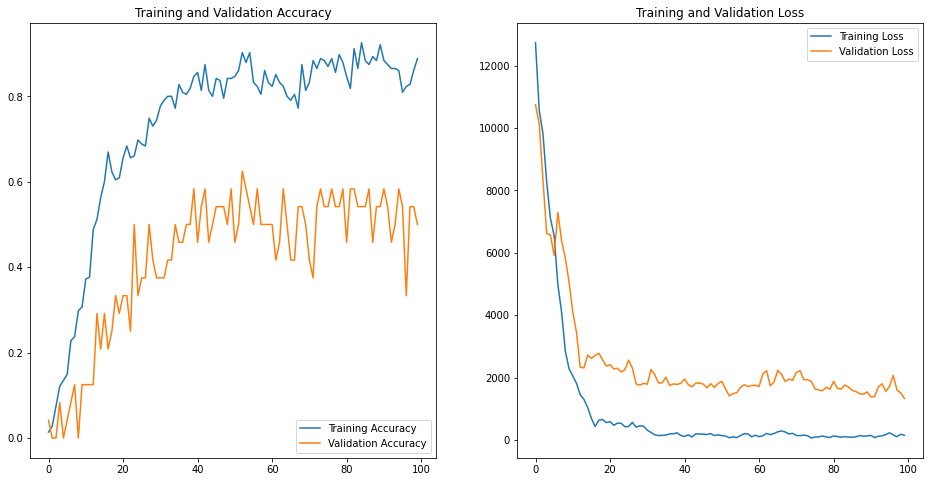

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# la gráfica de la izquierda es la precisión 
#--Unidades o units=  generalmente son potencias de 2, ejemplo: 128, 256, 512, etc. y número de capas hidden_layers= entre 1 y 3 
#--La linea azul, corresponde a la precisión en el conjunto de entrenamiento (para las primeras tantas denuncias)
#--La linea naranja, corresponde al conjunto de validación y para este proyecto, se busca sea más del 98% de precisión, en el que significa que las nuevas denuncias son las que le atinarán a las fechas ...

#la gráfica de la derecha es la de perdida o error 
#--Esta debe ser lo más cercana a 0 para las 2 líneas. 

In [ ]:
#08/07/2022 - AUMENTAR LA CAPACIDAD DE HACER EXPERIMENTO CON CAPACIDADES MÁS GRANDE (2 CAPAS, ETC. ), HASTA LA QUE LA LINEA DE LA DERECHA, ESTÉ EN FORMA DE U (SIGNIFICA QUE YA SE PASÓ DE LA CAPACIDAD Y NO SIRVE PARA PREDECIR VALORES)
#REINICIAR EL KERNEL CADA VEZ QUE SE AUMENTA LA CAPACIDAD 
#PONER MUCHA CAPACIDADY MEDIA 
#SI SE PUEDE, NORMALIZAR Y EXPERIMENTAR 
#https://stackoverflow.com/questions/21030391/how-to-normalize-a-numpy-array-to-a-unit-vector
